In [3]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#File to load
cab_data_path = "Resources/Kaggle_Data/cab_rides.csv"

#Read the Cab data
cab_df = pd.read_csv(cab_data_path)

#Display the cab_df file for preview
cab_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [41]:
#Clean Data

#Convert the 13-digit timestamp to a date-time format
import datetime
cab_df['Time Stamp'] = pd.to_datetime(cab_df['time_stamp']/1000, unit = 's')
cab_df['Day of Week'] = cab_df['Time Stamp'].dt.dayofweek

#Remove columns that are not applicable to analysis
cleaned_cab_df = cab_df[['distance', 'cab_type', 'destination', 'source', 'price', 'Day of Week']]

#Rename columns
cleaned_cab_df = cleaned_cab_df.rename(columns = {'distance': 'Distance',
                                                  'cab_type': 'Company',
                                                  'destination': 'Destination',
                                                  'source': 'Source',
                                                  'price': 'Price'})

#Remove rows that are missing values
cleaned_cab_df = cleaned_cab_df.dropna(how='any')

cleaned_cab_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
693065,1.00,Uber,North End,West End,9.5,5
693066,1.00,Uber,North End,West End,13.0,5
693067,1.00,Uber,North End,West End,9.5,5
693069,1.00,Uber,North End,West End,27.0,5


In [5]:
#Print research question
print('How do ride distance and ride price compare across the various ride sources?')

How do ride distance and ride price compare across the various ride sources?


In [31]:
grouped_by_source = cleaned_cab_df.groupby('Source')
grouped_by_destination = cleaned_cab_df.groupby('Destination')

source_counts = grouped_by_source.count()['Distance']
destination_counts = grouped_by_destination.count()['Distance']
source_average_price = grouped_by_source['Price'].mean()
destination_average_price = grouped_by_destination['Price'].mean()
source_average_distance = grouped_by_source['Distance'].mean()
destination_average_distance = grouped_by_destination['Distance'].mean()

grouped_location_summary = pd.concat([source_counts, destination_counts, source_average_price, destination_average_price, source_average_distance,destination_average_distance ], axis = 1)
grouped_location_summary.columns = ['Count as Source', 'Count as Destination', 'Average Price as Source', 'Average Price as Destination', 'Average Distance as Source', 'Average Distance as Destination']
grouped_location_summary

,Count as Source,Count as Destination,Average Price as Source,Average Price as Destination,Average Distance as Source,Average Distance as Destination
Back Bay,57792,57780,16.047394,16.210152,1.996008,2.086087
Beacon Hill,57403,57403,15.664030,16.248335,2.033632,2.215853
Boston University,57764,57764,18.853034,18.942137,3.050436,3.012284
Fenway,57757,57757,18.379491,18.146419,2.810573,2.860366
Financial District,58857,58851,18.181372,18.046280,2.714787,2.589169
Haymarket Square,57736,57764,13.578114,14.255553,1.117391,1.330357
North End,57763,57756,15.153373,15.002210,1.607696,1.639349
North Station,57118,57119,16.364006,16.805238,2.216295,2.224309
Northeastern University,57756,57755,17.901124,17.827517,2.728966,2.642147
South Station,57750,57749,15.672479,14.828549,1.846257,1.626802


(-0.5, 11.5)

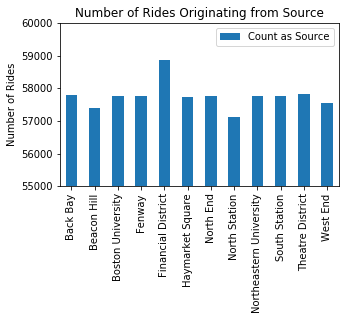

In [40]:
count_as_source_series = pd.DataFrame(grouped_location_summary['Count as Source'])
count_as_source_series.plot(kind = 'bar', figsize = (5,3))

plt.title("Number of Rides Originating from Source")
plt.ylabel("Number of Rides")
plt.ylim(55000, 60000)
plt.xlim(-.5, len(count_as_source_series)-.5)

In [ ]:
count_as_destination_series = pd.DataFrame(grouped_location_summary['Count as Destination'])
count_as_destination_series.plot(kind = 'bar', figsize = (5,3))

plt.title("Number of Rides Originating from Source")
plt.ylabel("Number of Rides")
plt.ylim(55000, 60000)
plt.xlim(-.5, len(count_as_source_series)-.5)